## Análisis de datos - Clase 6

# Taller práctico - análisis de un dataset


En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [952]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [953]:
# Dataset de carreras del 2024
raw_carreras_24 = pd.read_csv('../datasets/f1_2024_R.csv')

---
## EDA (Exploratory Data Analysis)
---

### Columnas y tipos de datos

In [954]:
raw_carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'SessionType',
       'EventDate', 'Time_weather', 'AirTemp', 'TrackTemp', 'Humidity',
       'AvgSpeed', 'MaxThrottle', 'AvgBrake'],
      dtype='object')

In [955]:
# Armamos un nuevo dataset con menos columnas para el análisis
carreras_24 = raw_carreras_24.drop(columns=['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
        'SessionType', 'AvgSpeed', 'MaxThrottle', 'AvgBrake', 'Time_weather'], axis=1)

In [956]:
carreras_24.shape

(26606, 32)

In [957]:
carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1',
       'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'EventDate', 'AirTemp',
       'TrackTemp', 'Humidity'],
      dtype='object')


### Detalles de las columnas del dataset

#### Evento
* EventName
* EventDate

#### Corredor y equipo
* Driver: nombre del piloto
* DriverNumber: número del piloto
* Team: nombre del equipo constructor
* Grid: posición de salida (1,2,3, etc.) ### ????

#### Vueltas y tiempos
* PitInLap: tiempo desde el comienzo de la vuelta en el que el piloto entra en boxes (timedelta).
* PitOutLap: tiempo desde el comienzo de la vuelta en el que el piloto sale de boxes (timedelta).
* IsPersonalBest: indica si la vuelta fue la mejor del piloto en la sesión (1,0)
* Stint: indica el cambio de cubiertas (1,2,3, etc.)
* LapTime: tiempo de la vuelta (en segundos)
* LapNumber: número de vuelta (1,2,3, etc.)
* LapStartTime
* LapStartDate
* Sector1Time
* Sector2Time
* Sector3Time

#### Telemetría

* SpeedI1, SpeedI2: velocidad en dos puntos intermedio de la vuelta (km/h)
* SpeedFL: velocidad en la línea de meta (km/h)
* SpeedST: velocidad en el speed trap que es el punto más rápido en la recta (km/h)

#### Condiciones climáticas
* AirTemp: temperatura del aire (°C)
* TrackTemp: temperatura de la pista (°C)
* Humidity: humedad (%)

#### Cubiertas
* Compound: tipo de cubierta (Duro, Medio, Blando, de lluvia, etc.)
* TyreLife: vida útil de la cubierta (número de vueltas)
* FreshTyre: indica si la cubierta es nueva o usada (1,0)

#### Contexto

* TrackStatus: las condiciones de la pista (1 para verde, 2 para amarilla, 4 para Safety Car)
* Position: la posición del piloto al final de la vuelta (1,2,3, etc.)
* Deleted: indica si la vuelta fue eliminada (por alguna infracción, por ejemplo, por exceder los límites de la pista)
* DeletedReason: la razon por la que la vuelta fue eliminada (por ejemplo, por exceder los límites de la pista)
* FastF1Generated: indica si los datos fueron generados por FastF1 (por ejemplo, si la telemetría está incompleta)
* IsAccurate: indica si los datos son confiables (por ejemplo, si no hay interpolación)


In [958]:
# Reordeno las columnas para poder identificarlas y analizarlas más cómodamente 
nuevo_orden = ['EventName', 'EventDate',                           # Evento
               'Driver', 'DriverNumber', 'Team',                   # Corredor y equipo               
               'PitInTime', 'PitOutTime', 'IsPersonalBest',        # Vueltas y tiempos
               'Stint', 'LapTime', 'LapNumber',
               'LapStartTime', 'LapStartDate',
               'Sector1Time', 'Sector2Time', 'Sector3Time',
               'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',         # Telemetría
               'AirTemp', 'TrackTemp', 'Humidity',                 # Condiciones climáticas
               'Compound', 'TyreLife', 'FreshTyre',                # Cubiertas

               'TrackStatus', 'Position',                          # Contexto
               'Deleted', 'DeletedReason',
               'FastF1Generated', 'IsAccurate'
]
carreras_24 = carreras_24[nuevo_orden]

### Vista general del dataset

In [959]:
carreras_24.head(10)

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,2024-03-02,VER,1,Red Bull Racing,NaN,NaN,False,1.0,97.284,...,49.0,SOFT,4.0,False,12,1.0,False,NaN,False,False
1,Bahrain Grand Prix,2024-03-02,LEC,16,Ferrari,NaN,NaN,False,1.0,98.271,...,49.0,SOFT,4.0,False,12,2.0,False,NaN,False,False
2,Bahrain Grand Prix,2024-03-02,RUS,63,Mercedes,NaN,NaN,False,1.0,99.228,...,49.0,SOFT,4.0,False,12,3.0,False,NaN,False,False
3,Bahrain Grand Prix,2024-03-02,NOR,4,McLaren,NaN,NaN,False,1.0,102.168,...,49.0,SOFT,4.0,False,12,7.0,False,NaN,False,False
4,Bahrain Grand Prix,2024-03-02,HAM,44,Mercedes,NaN,NaN,False,1.0,103.122,...,49.0,SOFT,4.0,False,12,9.0,False,NaN,False,False
5,Bahrain Grand Prix,2024-03-02,PIA,81,McLaren,NaN,NaN,False,1.0,102.523,...,49.0,SOFT,4.0,False,12,8.0,False,NaN,False,False
6,Bahrain Grand Prix,2024-03-02,ALO,14,Aston Martin,NaN,NaN,False,1.0,101.679,...,49.0,SOFT,4.0,False,12,6.0,False,NaN,False,False
7,Bahrain Grand Prix,2024-03-02,SAR,2,Williams,NaN,NaN,False,1.0,105.921,...,49.0,SOFT,1.0,True,12,15.0,False,NaN,False,False
8,Bahrain Grand Prix,2024-03-02,SAI,55,Ferrari,NaN,NaN,False,1.0,100.620,...,49.0,SOFT,4.0,False,12,5.0,False,NaN,False,False
9,Bahrain Grand Prix,2024-03-02,ZHO,24,Kick Sauber,NaN,NaN,False,1.0,104.801,...,49.0,SOFT,1.0,True,12,13.0,False,NaN,False,False


In [960]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EventName        26606 non-null  object 
 1   EventDate        26606 non-null  object 
 2   Driver           26606 non-null  object 
 3   DriverNumber     26606 non-null  int64  
 4   Team             26606 non-null  object 
 5   PitInTime        849 non-null    object 
 6   PitOutTime       840 non-null    object 
 7   IsPersonalBest   26591 non-null  object 
 8   Stint            26606 non-null  float64
 9   LapTime          26381 non-null  float64
 10  LapNumber        26606 non-null  float64
 11  LapStartTime     26606 non-null  float64
 12  LapStartDate     26591 non-null  object 
 13  Sector1Time      26066 non-null  float64
 14  Sector2Time      26574 non-null  float64
 15  Sector3Time      26553 non-null  float64
 16  SpeedI1          22460 non-null  float64
 17  SpeedI2     

In [961]:
# Me fijo si hay algún valor raro en posición
carreras_24[(carreras_24['Position'] < 1) | (carreras_24['Position'] > 20)]

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate


### Ajustamos los tipos de datos

In [962]:
# Categóricas
carreras_24['EventName'] = carreras_24['EventName'].astype('category')
carreras_24['Driver'] = carreras_24['Driver'].astype('category')
carreras_24['DriverNumber'] = carreras_24['DriverNumber'].astype('category')
carreras_24['Team'] = carreras_24['Team'].astype('category')
carreras_24['FreshTyre'] = carreras_24['FreshTyre'].astype('category')
carreras_24['TyreLife'] = carreras_24['TyreLife'].astype('category')
carreras_24['Compound'] = carreras_24['Compound'].astype('category')
carreras_24['Stint'] = carreras_24['Stint'].astype('category')
carreras_24['IsPersonalBest'] = carreras_24['IsPersonalBest'].astype('category')
carreras_24['Deleted'] = carreras_24['Deleted'].astype('category')
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].astype('category')
carreras_24['TrackStatus'] = carreras_24['TrackStatus'].astype('category')
carreras_24['FastF1Generated'] = carreras_24['FastF1Generated'].astype('category')
carreras_24['IsAccurate'] = carreras_24['IsAccurate'].astype('category')

# Categórica ordinal
posicion_orden = list(range(1, 21))
carreras_24['Position'] = pd.Categorical(carreras_24['Position'], categories=posicion_orden, ordered=True) 


# Numéricas temporales
carreras_24['EventDate'] = pd.to_datetime(carreras_24['EventDate'])
carreras_24['PitInTime'] = pd.to_timedelta(carreras_24['PitInTime'])
carreras_24['PitOutTime'] = pd.to_timedelta(carreras_24['PitOutTime'])
carreras_24['LapStartDate'] = pd.to_datetime(carreras_24['LapStartDate'])

# Numéricas discretas
carreras_24['LapNumber'] = carreras_24['LapNumber'].astype('int')



In [963]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   EventName        26606 non-null  category       
 1   EventDate        26606 non-null  datetime64[ns] 
 2   Driver           26606 non-null  category       
 3   DriverNumber     26606 non-null  category       
 4   Team             26606 non-null  category       
 5   PitInTime        849 non-null    timedelta64[ns]
 6   PitOutTime       840 non-null    timedelta64[ns]
 7   IsPersonalBest   26591 non-null  category       
 8   Stint            26606 non-null  category       
 9   LapTime          26381 non-null  float64        
 10  LapNumber        26606 non-null  int64          
 11  LapStartTime     26606 non-null  float64        
 12  LapStartDate     26591 non-null  datetime64[ns] 
 13  Sector1Time      26066 non-null  float64        
 14  Sector2Time      26574

---

---
### Variables categóricas: exploración
---

In [964]:
carreras_24[carreras_24['Position'] == '0']

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate


In [965]:
carreras_24.describe(include='category')

,EventName,Driver,DriverNumber,Team,IsPersonalBest,Stint,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
count,26606,26606,26606,26606,26591,26606.0,26606,26606.0,26606,26606,26578,26606,326,26606,26606
unique,24,24,25,10,2,5.0,6,78.0,2,25,20,2,255,2,2
top,Dutch Grand Prix,PIA,81,McLaren,False,2.0,HARD,4.0,True,1,6,False,TRACK LIMITS AT TURN 1 LAP 10,False,True
freq,1426,1444,1444,2881,21094,11438.0,13767,1162.0,21042,24604,1444,26280,5,26578,23557


#### Evento

In [966]:
# Grand Prix que se corrieron en el 2024
carreras_24['EventName'].unique()

['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Japanese Grand Prix', 'Chinese Grand Prix', ..., 'Mexico City Grand Prix', 'São Paulo Grand Prix', 'Las Vegas Grand Prix', 'Qatar Grand Prix', 'Abu Dhabi Grand Prix']
Length: 24
Categories (24, object): ['Abu Dhabi Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix', 'Azerbaijan Grand Prix', ..., 'Singapore Grand Prix', 'Spanish Grand Prix', 'São Paulo Grand Prix', 'United States Grand Prix']

#### Corredor y equipo

In [967]:
# Pilotos que corrieron en el 2024
carreras_24['Driver'].unique()

['VER', 'LEC', 'RUS', 'NOR', 'HAM', ..., 'STR', 'BEA', 'COL', 'LAW', 'DOO']
Length: 24
Categories (24, object): ['ALB', 'ALO', 'BEA', 'BOT', ..., 'STR', 'TSU', 'VER', 'ZHO']

In [968]:
# Equipos
carreras_24['Team'].unique()

['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren', 'Aston Martin', 'Williams', 'Kick Sauber', 'RB', 'Haas F1 Team', 'Alpine']
Categories (10, object): ['Alpine', 'Aston Martin', 'Ferrari', 'Haas F1 Team', ..., 'Mercedes', 'RB', 'Red Bull Racing', 'Williams']

#### Cubiertas

In [969]:
carreras_24['Compound'].unique()

['SOFT', 'HARD', 'MEDIUM', 'INTERMEDIATE', 'WET', 'UNKNOWN']
Categories (6, object): ['HARD', 'INTERMEDIATE', 'MEDIUM', 'SOFT', 'UNKNOWN', 'WET']

<Axes: xlabel='Compound', ylabel='count'>

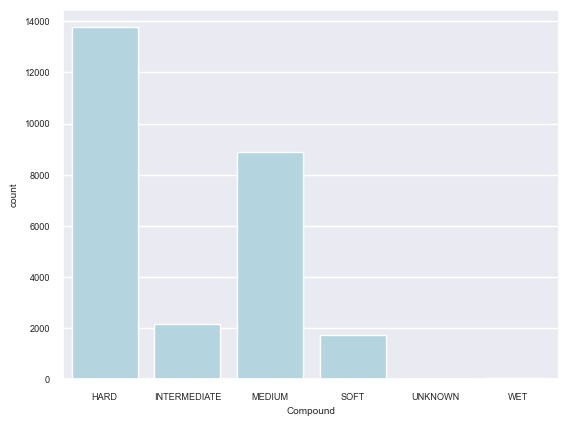

In [970]:
#fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(data=carreras_24, x='Compound', color="lightblue")

In [971]:
carreras_24['FreshTyre'].unique()

[False, True]
Categories (2, bool): [False, True]

In [972]:
carreras_24['TyreLife'].unique()

[4.0, 1.0, 5.0, 2.0, 6.0, ..., 74.0, 75.0, 76.0, 77.0, 78.0]
Length: 78
Categories (78, float64): [1.0, 2.0, 3.0, 4.0, ..., 75.0, 76.0, 77.0, 78.0]

#### Contexto

**Variable TrackStatus**

Valores conocidos (https://docs.fastf1.dev/api.html#fastf1.api.track_status_data)

* 1: Track clear (beginning of session or to indicate the end of another status)
* 2: Yellow flag (sectors are unknown)
* 3: ??? Never seen so far, does not exist?
* 4: Safety Car
* 5: Red Flag
* 6: Virtual Safety Car deployed
* 7: Virtual Safety Car ending (As indicated on the drivers steering wheel, on tv and so on; status ‘1’ will mark the actual end)

In [973]:
carreras_24['TrackStatus'].unique()

[12, 1, 21, 124, 24, ..., 412, 267, 45, 51, 1264]
Length: 25
Categories (25, int64): [1, 4, 6, 12, ..., 1254, 1264, 1267, 2671]

<Axes: xlabel='TrackStatus', ylabel='percent'>

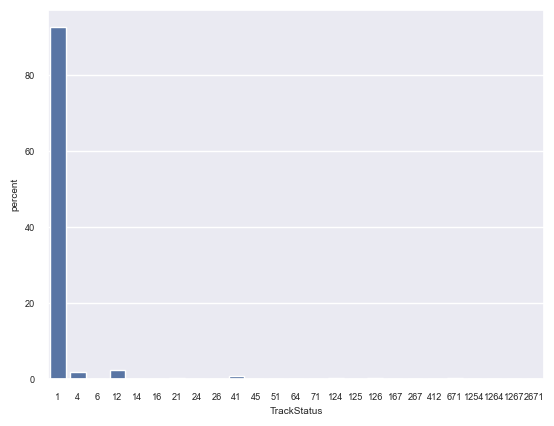

In [974]:
sns.set_theme(font_scale=0.6)
sns.countplot(data=carreras_24, x= 'TrackStatus', stat='percent' )

---
### Variables numéricas: estadística descriptiva
---

In [975]:
# Para usar una función custom que guardé en utils
import sys
import os

# Agrego el path para poder importar utils
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.plotting import plot_histograma

In [976]:
carreras_24.describe()

,EventDate,PitInTime,PitOutTime,LapTime,LapNumber,LapStartTime,LapStartDate,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,AirTemp,TrackTemp,Humidity
count,26606,849,840,26381.000000,26606.000000,26606.000000,26591,26066.000000,26574.000000,26553.000000,22460.000000,26552.000000,25728.000000,24422.000000,26606.000000,26606.000000,26606.000000
mean,2024-07-20 19:42:45.165752064,0 days 01:36:26.654181389,0 days 01:37:42.147103571,92.727333,30.507931,6191.722126,2024-07-21 10:47:01.542331648,28.544514,35.105664,27.942290,254.994167,247.649292,268.093711,296.643928,23.490434,35.588191,54.358303
min,2024-03-02 00:00:00,0 days 00:15:20.353000,0 days 00:04:17.809000,67.694000,1.000000,245.608000,2024-03-02 15:03:42.342000,16.897000,17.488000,17.690000,59.000000,57.000000,1.000000,64.000000,14.500000,16.700000,30.000000
25%,2024-05-19 00:00:00,0 days 01:16:58.954000,0 days 01:18:31.260750,81.964000,15.000000,4707.357750,2024-05-19 13:42:25.069499904,25.398250,29.584000,23.076000,214.000000,211.000000,248.000000,289.000000,19.200000,28.700000,45.000000
50%,2024-07-07 00:00:00,0 days 01:38:45.781000,0 days 01:38:21.220500,89.076000,30.000000,6136.312500,2024-07-07 15:08:57.716000,28.470000,32.958000,25.949000,273.000000,257.000000,275.000000,302.000000,22.000000,37.000000,53.000000
75%,2024-09-22 00:00:00,0 days 01:53:19.090000,0 days 01:53:11.494750,98.704000,45.000000,7584.237750,2024-09-22 13:16:06.315500032,31.086000,41.288000,31.986000,289.000000,280.000000,291.000000,313.000000,28.300000,43.500000,63.000000
max,2024-12-08 00:00:00,0 days 03:10:59.688000,0 days 03:11:24.136000,2526.253000,78.000000,11925.420000,2024-12-08 14:30:04.406000,97.585000,90.308000,97.241000,357.000000,343.000000,357.000000,362.000000,33.900000,51.700000,92.000000
std,NaN,0 days 00:24:02.916710214,0 days 00:24:21.070185,60.498621,18.260169,1929.832188,NaN,6.928019,7.506386,7.434872,45.269851,43.887292,34.744874,31.732479,4.789366,9.032689,13.877374


#### Histogramas

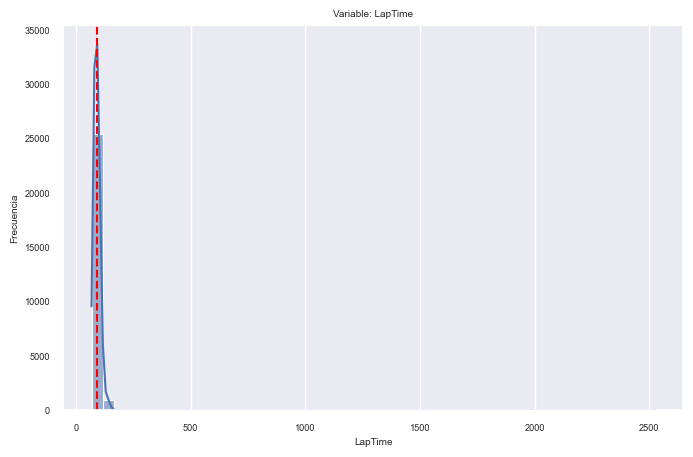

In [977]:
plot_histograma(carreras_24, column='LapTime', figsize=(8,5), bins=50, mvd=False)

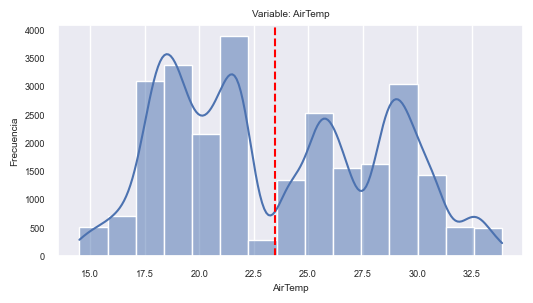

In [978]:
plot_histograma(carreras_24, column='AirTemp', bins=15, mvd=False)

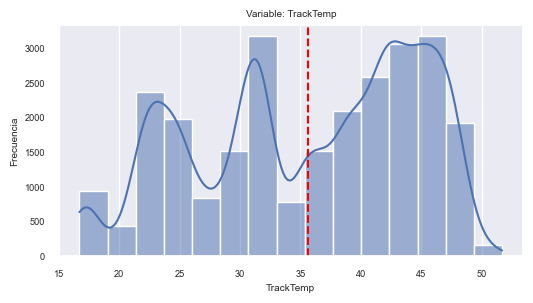

In [979]:
plot_histograma(carreras_24, column='TrackTemp', bins=15, mvd=False)

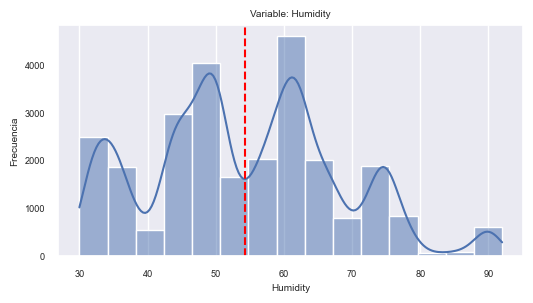

In [980]:
plot_histograma(carreras_24, column='Humidity', bins=15, mvd=False)

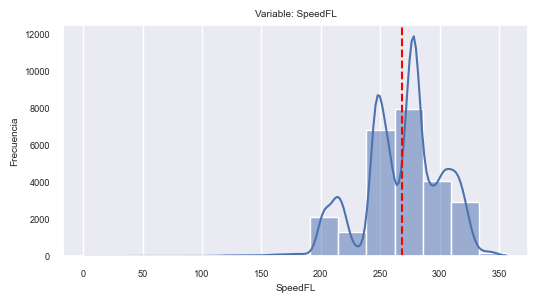

In [981]:
# Velocidad al cruzar la meta
plot_histograma(carreras_24, column='SpeedFL', bins=15, mvd=False)

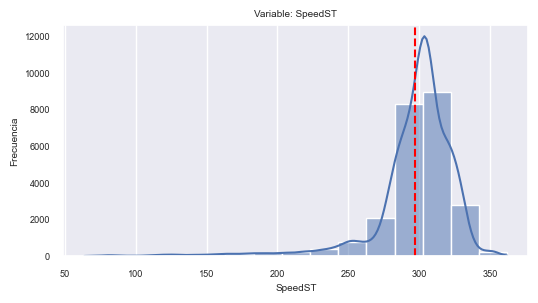

In [982]:
# Velocidad en el speed trap (la parte más rápida de la pista)
plot_histograma(carreras_24, column='SpeedST', bins=15, mvd=False)

#### Boxplots

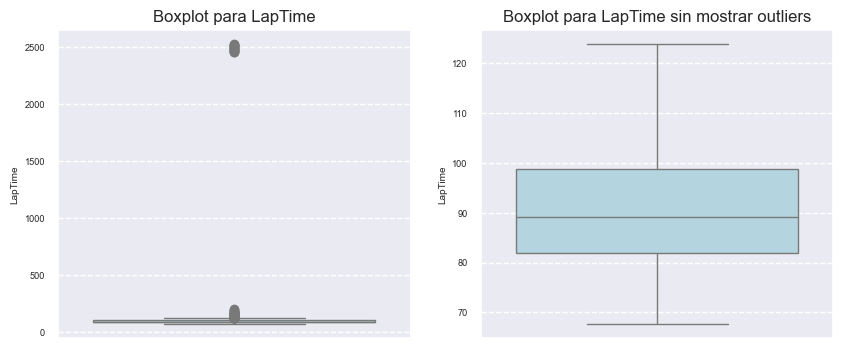

In [983]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=carreras_24, y='LapTime', color="lightblue", ax=ax[0])
sns.boxplot(data=carreras_24, y='LapTime', color="lightblue", showfliers= False, ax=ax[1])       
ax[0].grid(axis='y', ls='--')
ax[0].set_title('Boxplot para LapTime', fontsize=12)
ax[1].grid(axis='y', ls='--')
ax[1].set_title('Boxplot para LapTime sin mostrar outliers', fontsize=12)

plt.show()

Nota: observar que este boxplot muestra la dispersión del tiempo de vuelta pero considerando TODAS las carreras juntas.

---
### Visualizaciones entre pares de variables
---

#### 1) Carreras
---

<Axes: title={'center': 'Nro. de vueltas por circuito'}, ylabel='EventName'>

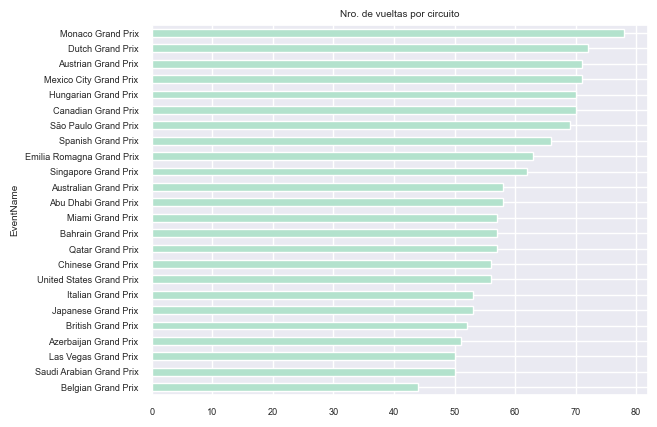

In [984]:
carreras_24.groupby(['EventName'], observed=True)['LapNumber'].max().sort_values().plot(kind='barh', colormap='Pastel2' , title='Nro. de vueltas por circuito')

Text(0.5, 1.0, 'Boxplots de LapTime (en seg) para cada carrera')

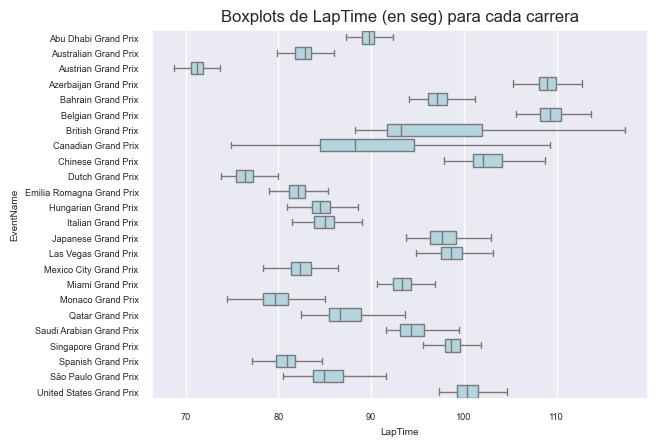

In [985]:
# Tiempo de vuuelta por carrera

sns.boxplot(data=carreras_24, x='LapTime', y='EventName', color="lightblue", showfliers=False)
plt.title('Boxplots de LapTime (en seg) para cada carrera',fontsize=12)

#### 2) Condiciones de la pista
---

Text(0.5, 1.0, 'Boxplots de TrackTemp (°C) para cada carrera')

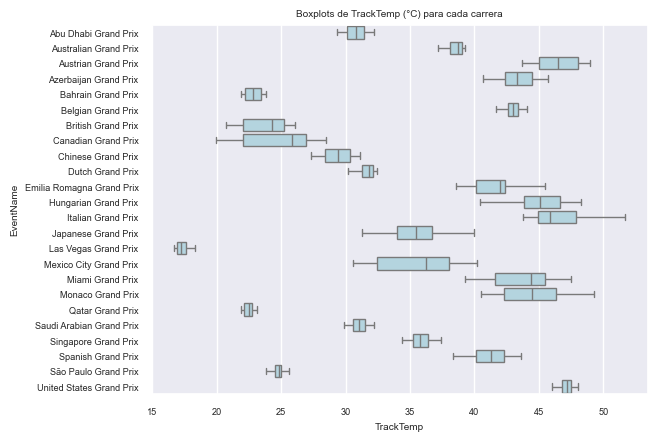

In [986]:
sns.boxplot(data=carreras_24, x='TrackTemp', y='EventName', color="lightblue", showfliers=False)
plt.title('Boxplots de TrackTemp (°C) para cada carrera')

#### 2) Performance de los pilotos
---

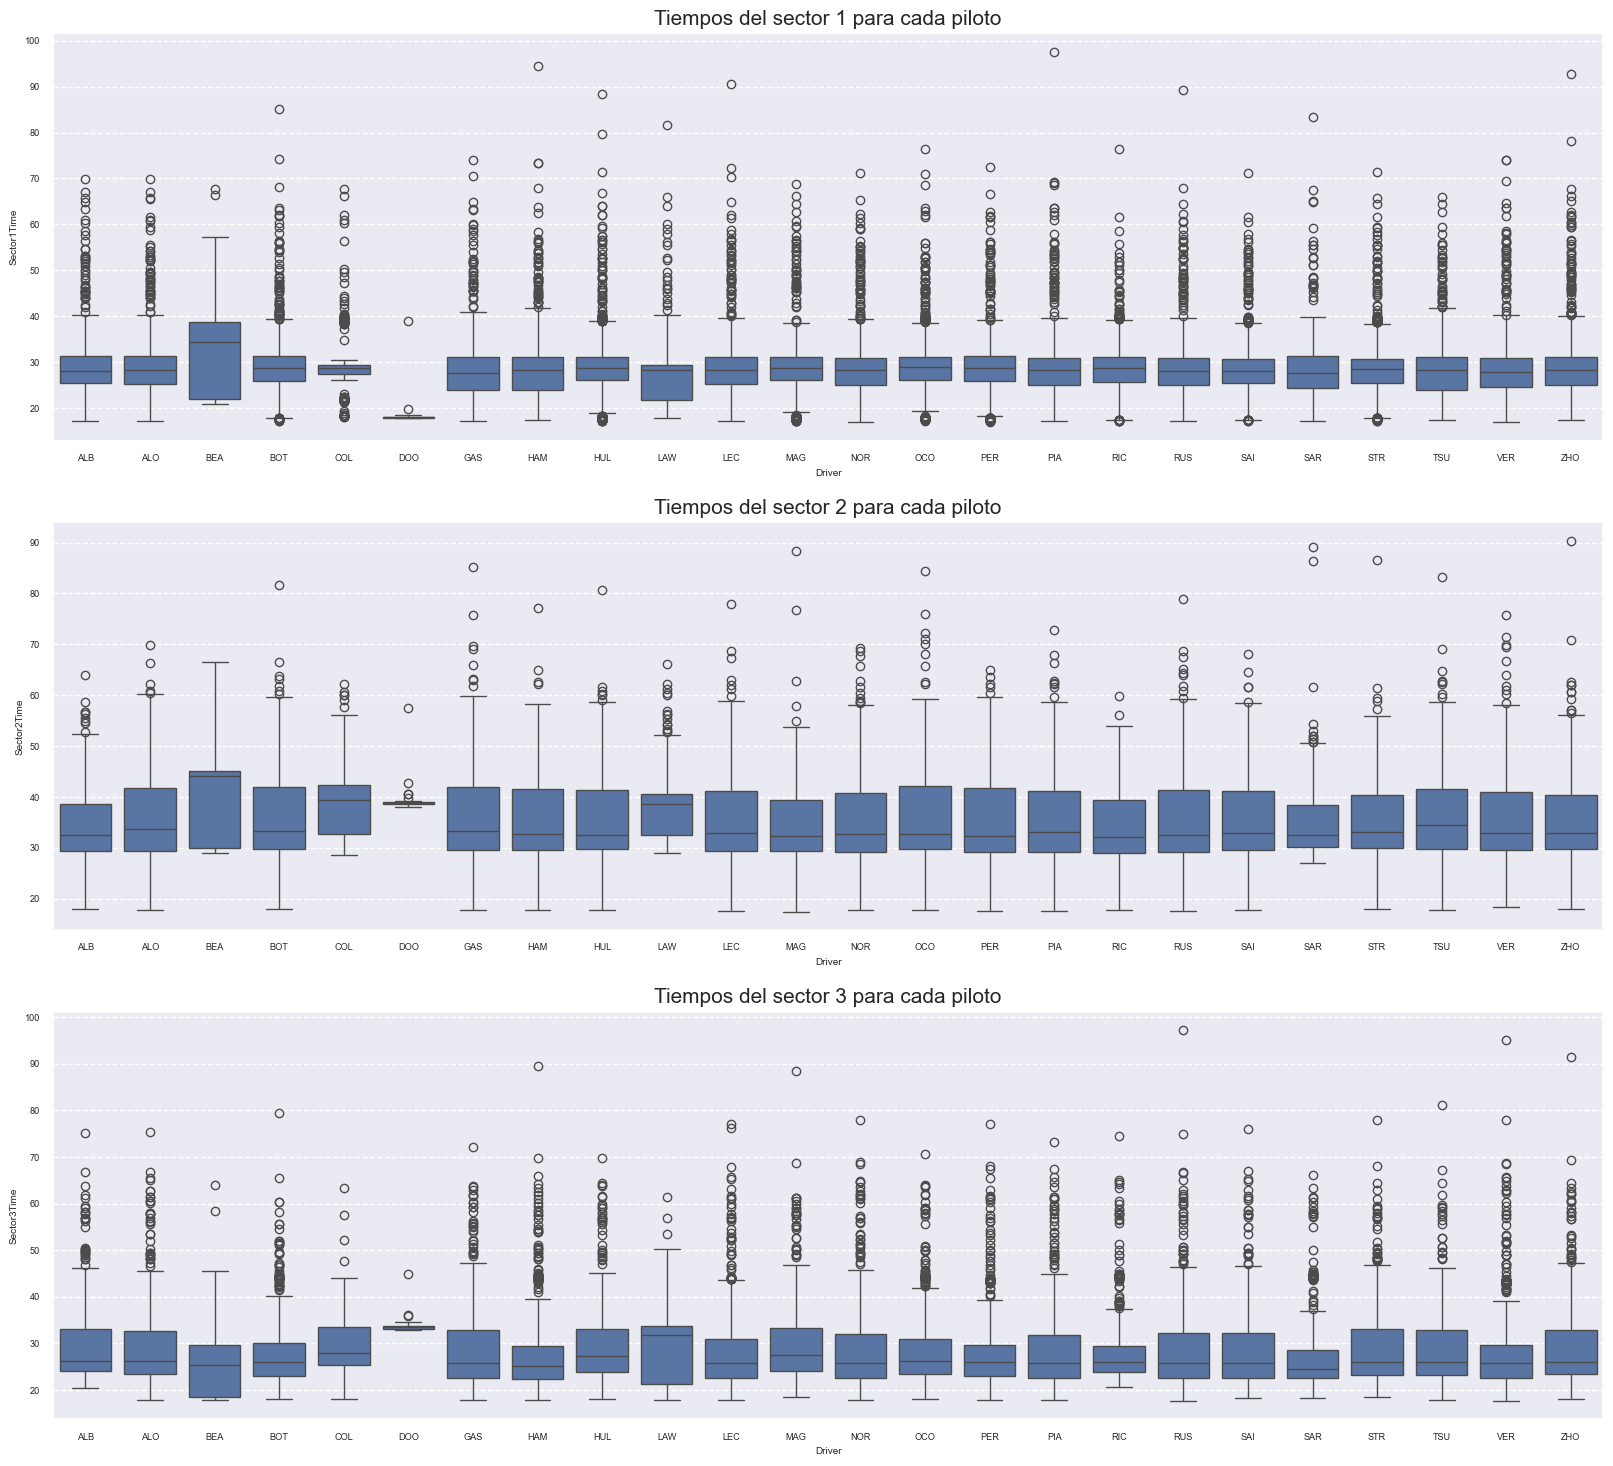

In [987]:
fig, ax = plt.subplots(3, 1,figsize=(20, 18))

sns.boxplot(data=carreras_24, y='Sector1Time', x='Driver', ax=ax[0])
sns.boxplot(data=carreras_24, y='Sector2Time', x='Driver', ax=ax[1])
sns.boxplot(data=carreras_24, y='Sector3Time', x='Driver', ax=ax[2])

for i in (0,1,2):
    ax[i].grid(axis='y', ls='--')
    ax[i].set_title(f'Tiempos del sector {i+1} para cada piloto', fontsize=15)

plt.show()

Nota: Aquí vemos la dispersión de los tiempos de cada piloto para cada sector. Es importante tener en cuenta que estamos viendo los tiempos para todas las carreras juntas (y no todos los circuitos son iguales en longitud)

#### Tiempos por sector para un piloto y circuito determinado

In [988]:
# Función auxiliar para graficar los tiempos por vuelta de cada piloto, para cada sector. Se puede graficar para una carrera o para todas juntas
def scatter(driver, race='all'):
    if race == 'all':
        df = carreras_24[carreras_24['Driver']==driver]
    else:
        df = carreras_24[(carreras_24['Driver']==driver) & (carreras_24['EventName']==race)]

    plt.figure(figsize=(10, 5))
    plt.scatter(df['LapNumber'], df['Sector1Time'], label='Sector 1', alpha=0.7)
    plt.scatter(df['LapNumber'], df['Sector2Time'], label='Sector 2', alpha=0.7)
    plt.scatter(df['LapNumber'], df['Sector3Time'], label='Sector 3', alpha=0.7)

    plt.xlabel('')
    plt.ylabel('Time')
    plt.title(f'Tiempos por sector - Piloto: {driver} - Carrera(s): {race}', fontsize=12)
    plt.legend()
    plt.xticks(list(range(1,85,3)))
    plt.show()

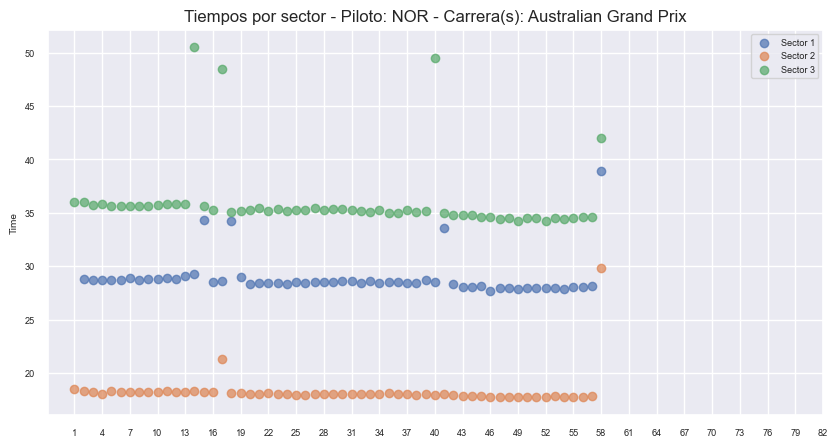

In [989]:
scatter('NOR', 'Australian Grand Prix')

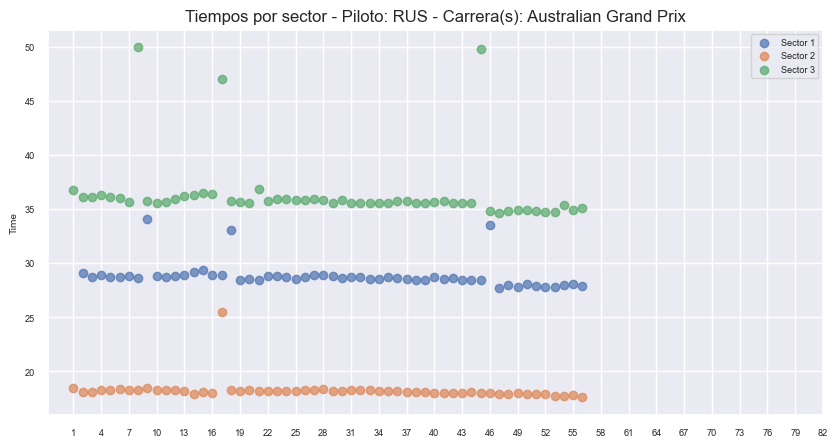

In [990]:
scatter('RUS', 'Australian Grand Prix')

Obs: pareciera haber sucedido algo en la vuelta 17 porque ambos pilotos muestran tiempos más altos.

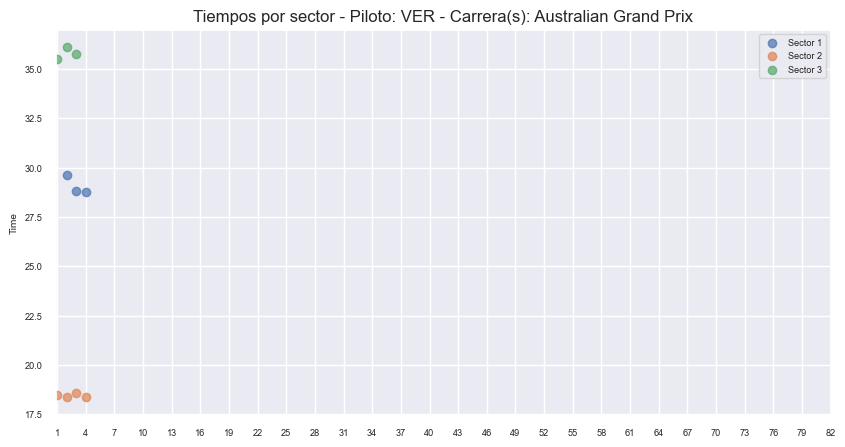

In [991]:
scatter('VER', 'Australian Grand Prix')

Nota: No hay datos de Verstappen más allá de la vuelta 4 - DNF?

#### Vista general de las vueltas completadas en cada carrera

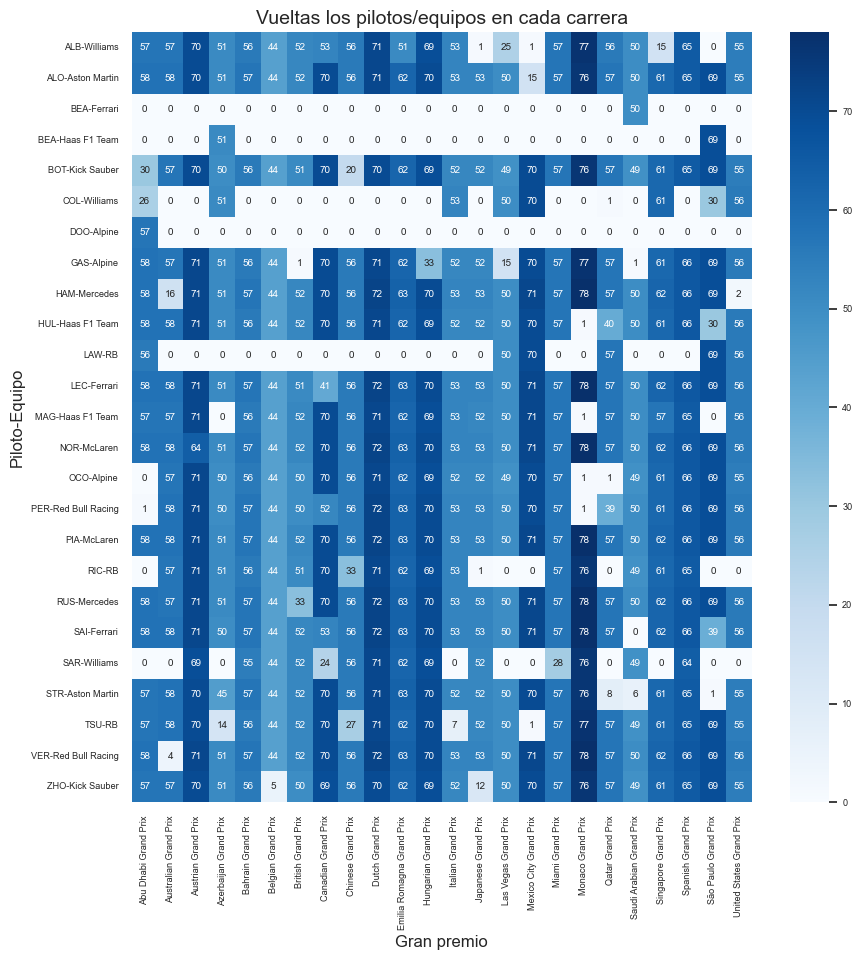

In [992]:
# Pilotos por equipo por carrera

plt.figure(figsize=(10, 10))
cross_tab = pd.crosstab([carreras_24['Driver'], carreras_24['Team']], carreras_24['EventName'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Vueltas los pilotos/equipos en cada carrera', fontsize=14)
plt.xlabel('Gran premio', fontsize=12)
plt.ylabel('Piloto-Equipo', fontsize=12)
plt.show()

#### Resumen de carreras en los que participó cada piloto durante el 2024

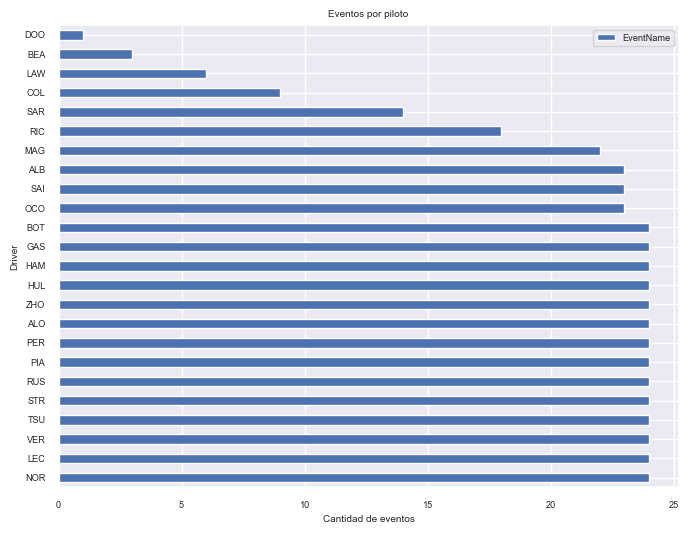

In [993]:
# Total de carreras en las que participó cada piloto
driver_events = carreras_24.groupby('Driver', observed=True)['EventName'].nunique().reset_index()
driver_events = driver_events.sort_values(ascending=False, by='EventName')

driver_events.plot.barh(x='Driver', y='EventName', figsize=(8, 6))
plt.xlabel('Cantidad de eventos')
plt.title('Eventos por piloto')
plt.show()


#### ¿Para qué equipos corrió cada piloto en 2024?

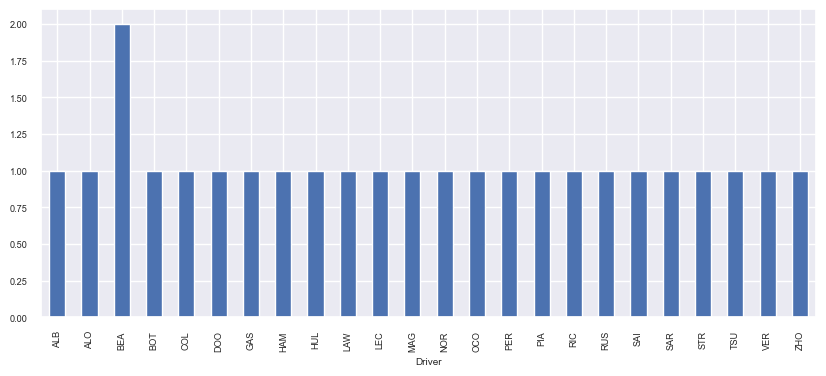

In [994]:
# ¿En cuántos equipos estuvo cada piloto?
teams = carreras_24.groupby('Driver', observed=True)['Team'].nunique().reset_index()
teams.plot(kind='bar', x='Driver', y='Team', figsize=(10, 4), legend=False)
plt.show()

In [995]:
#!conda install networkx
#!poetry add networkx

In [996]:
import networkx as nx
from networkx.drawing.layout import bipartite_layout

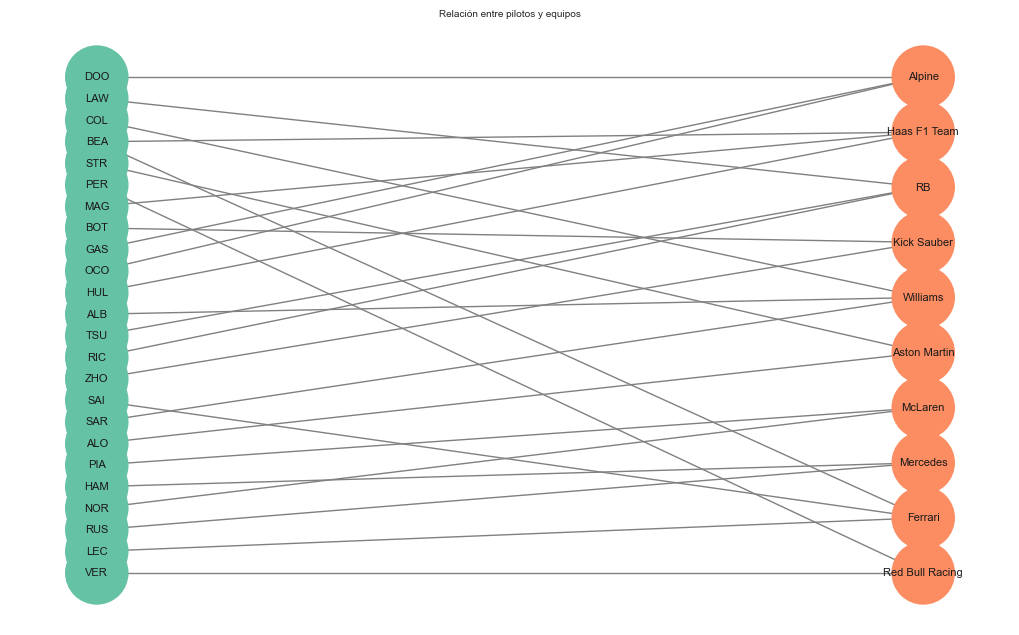

In [997]:
# Otro tipo de visualización: grafo bipartito entre pilotos y equipos

# Crear grafo
G = nx.Graph()
pares = carreras_24[['Driver', 'Team']].drop_duplicates()
pilotos = pares['Driver'].unique()
equipos = pares['Team'].unique()

G.add_nodes_from(pilotos, bipartite=0)
G.add_nodes_from(equipos, bipartite=1)
G.add_edges_from(list(pares.itertuples(index=False, name=None)))

# Layout bipartito
pos = bipartite_layout(G, pilotos)

# Figura
plt.figure(figsize=(10, 6))
nx.draw(G, pos,
        with_labels=True,
        node_size=2000,
        node_color=['#66c2a5' if n in pilotos else '#fc8d62' for n in G.nodes()],
        edge_color='gray',
        font_size=8)

plt.title('Relación entre pilotos y equipos')
plt.axis('off')
plt.show()

In [998]:
# Exporto dataset primera limpieza (uso parquet para que me guarde los tipos de datos que ajusté)
# carreras_24.to_parquet('../datasets/carreras_24_after_eda.parquet', engine='pyarrow', index=False)


---
#### Exporto el dataset con los cambios de dtype (para leer en la notebook de faltantes y outliers)
---

In [999]:
import json

# Detectar columnas categóricas
categorical_cols = [col for col, dtype in carreras_24.dtypes.items() if str(dtype) == 'category']

# Guardar los tipos como strings
dtypes_str = {col: str(dtype) for col, dtype in carreras_24.dtypes.items()}

# Guardar todo en un solo JSON
info = {
    "dtypes": dtypes_str,
    "categoricals": categorical_cols
}

with open("../datasets/carreras_24_1_dtypes.json", "w") as f:
    json.dump(info, f)

# exportar CSV
carreras_24.to_csv('../datasets/carreras_24_1.csv', index=False)